DATA MINING PROJECT - GROUP 8

Import Libraries and Data

In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [45]:
data = pd.read_csv('Kidney_disease.csv')
df = pd.DataFrame(data)
df

,Age,Gender,Weight,Diabetes,Hypertension,Kidney Failure Cause,Pre-Dialysis Blood Pressure,During-Dialysis Blood Pressure,Post-Dialysis Blood Pressure,Heart Rate,...,Dialysis Frequency (per week),Dialysate Composition,Vascular Access Type,Dialyzer Type,Kt/V,URR,Urine Output (ml/day),Dry Weight (kg),Fluid Removal Rate (ml/hour),Disease Severity
0,62,Female,97.4,True,True,Other,103,133,84,78,...,3,Customized,Graft,Low-flux,1.18,66.6,146,105.8,439.7,Severe
1,65,Male,72.7,True,False,Hypertension,164,132,84,68,...,2,Customized,Catheter,Low-flux,1.67,74.2,723,79.0,364.1,Severe
2,82,Male,111.6,False,True,Other,102,126,115,62,...,3,Customized,Catheter,Low-flux,1.84,65.3,495,114.2,337.9,Severe
3,85,Male,60.0,False,False,Hypertension,155,115,99,89,...,3,Customized,Fistula,High-flux,1.87,67.4,36,66.8,223.6,Severe
4,85,Male,52.1,False,False,Diabetes,140,152,124,75,...,3,Customized,Graft,High-flux,1.84,68.4,797,106.9,359.2,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Female,56.4,True,True,Hypertension,131,113,131,84,...,1,Standard,Fistula,High-flux,1.84,65.0,622,100.5,354.2,Moderate
4996,77,Male,66.6,False,True,Diabetes,150,144,90,63,...,1,Standard,Fistula,Low-flux,1.60,68.1,266,70.5,252.9,Severe
4997,26,Female,95.1,False,False,Hypertension,153,149,110,98,...,2,Standard,Fistula,Low-flux,1.92,67.1,56,84.7,282.8,Severe
4998,81,Female,99.9,False,True,Diabetes,152,102,96,89,...,3,Standard,Graft,Low-flux,1.16,65.6,974,110.4,444.9,Severe


Cleaning the Dataset

In [46]:
# Checking the data shape

df.shape 

(5000, 27)

In [47]:
#Checking the data types of each column

pd.DataFrame(df.dtypes)

,0
Age,int64
Gender,object
Weight,float64
Diabetes,bool
Hypertension,bool
Kidney Failure Cause,object
Pre-Dialysis Blood Pressure,int64
During-Dialysis Blood Pressure,int64
Post-Dialysis Blood Pressure,int64
Heart Rate,int64


In [48]:
df.isna().sum()

Age                               0
Gender                            0
Weight                            0
Diabetes                          0
Hypertension                      0
Kidney Failure Cause              0
Pre-Dialysis Blood Pressure       0
During-Dialysis Blood Pressure    0
Post-Dialysis Blood Pressure      0
Heart Rate                        0
Creatinine                        0
Urea                              0
Potassium                         0
Hemoglobin                        0
Hematocrit                        0
Albumin                           0
Dialysis Duration (hours)         0
Dialysis Frequency (per week)     0
Dialysate Composition             0
Vascular Access Type              0
Dialyzer Type                     0
Kt/V                              0
URR                               0
Urine Output (ml/day)             0
Dry Weight (kg)                   0
Fluid Removal Rate (ml/hour)      0
Disease Severity                  0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
df.describe()

,Age,Weight,Pre-Dialysis Blood Pressure,During-Dialysis Blood Pressure,Post-Dialysis Blood Pressure,Heart Rate,Creatinine,Urea,Potassium,Hemoglobin,Hematocrit,Albumin,Dialysis Duration (hours),Dialysis Frequency (per week),Kt/V,URR,Urine Output (ml/day),Dry Weight (kg),Fluid Removal Rate (ml/hour)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,53.433200,84.640320,139.812000,125.127600,109.769000,79.48040,5.491776,57.259880,4.507120,11.479880,37.470440,3.99978,4.006300,2.013800,1.502174,70.01120,497.903800,80.329720,350.067540
std,20.931669,20.285619,23.294737,20.037006,17.402937,11.53193,2.589487,24.692911,0.575339,2.014652,4.321661,0.57736,0.581761,0.820819,0.287894,2.88729,290.754627,20.382646,85.854451
min,18.000000,50.000000,100.000000,90.000000,80.000000,60.00000,1.000000,15.000000,3.500000,8.000000,30.000000,3.00000,3.000000,1.000000,1.000000,65.00000,0.000000,45.000000,200.000000
25%,35.000000,66.900000,119.000000,108.000000,95.000000,70.00000,3.230000,35.700000,4.000000,9.700000,33.700000,3.50000,3.500000,1.000000,1.260000,67.50000,244.000000,62.700000,275.875000
50%,53.000000,84.200000,140.000000,125.000000,110.000000,80.00000,5.505000,57.500000,4.500000,11.500000,37.500000,4.00000,4.000000,2.000000,1.500000,70.00000,493.000000,80.200000,353.500000
75%,72.000000,102.300000,160.000000,142.000000,125.000000,89.25000,7.722500,78.900000,5.000000,13.200000,41.200000,4.50000,4.500000,3.000000,1.750000,72.50000,748.000000,98.100000,423.000000
max,89.000000,120.000000,179.000000,159.000000,139.000000,99.00000,9.990000,100.000000,5.500000,15.000000,45.000000,5.00000,5.000000,3.000000,2.000000,75.00000,999.000000,115.000000,499.900000


In [51]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Diabetes', 'Hypertension',
       'Kidney Failure Cause', 'Pre-Dialysis Blood Pressure',
       'During-Dialysis Blood Pressure', 'Post-Dialysis Blood Pressure',
       'Heart Rate', 'Creatinine', 'Urea', 'Potassium', 'Hemoglobin',
       'Hematocrit', 'Albumin', 'Dialysis Duration (hours)',
       'Dialysis Frequency (per week)', 'Dialysate Composition',
       'Vascular Access Type', 'Dialyzer Type', 'Kt/V', 'URR',
       'Urine Output (ml/day)', 'Dry Weight (kg)',
       'Fluid Removal Rate (ml/hour)', 'Disease Severity'],
      dtype='object')

In [52]:
print(df['Age'].max())
print(df['Age'].min())

89
18


Data Visualization

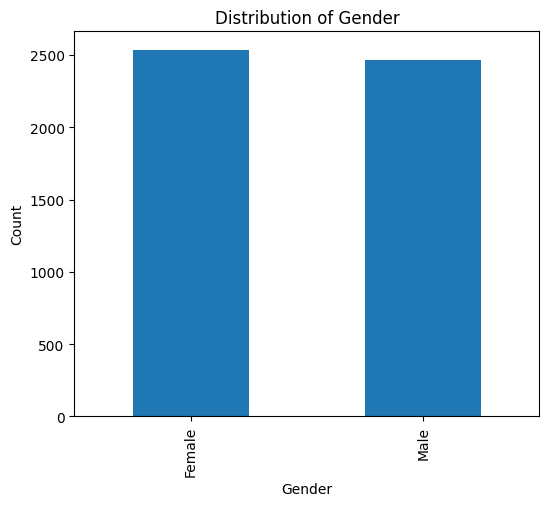

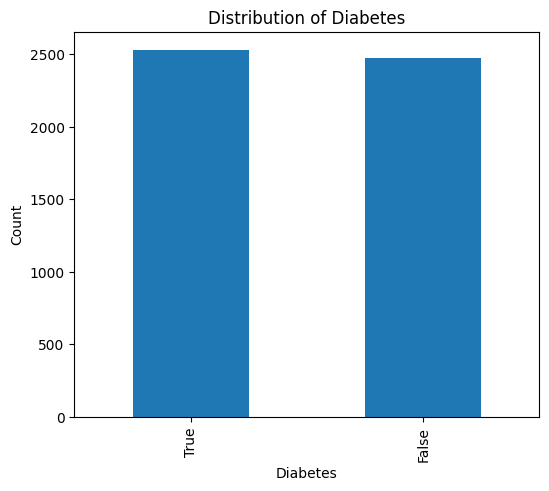

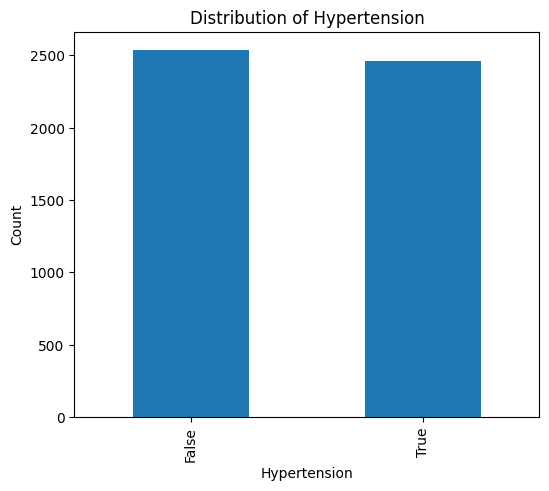

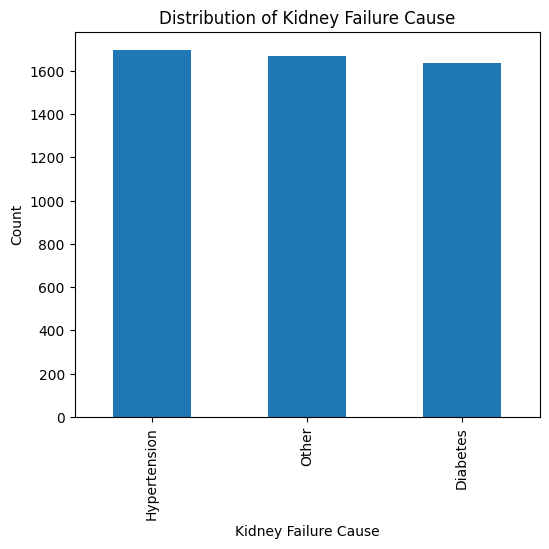

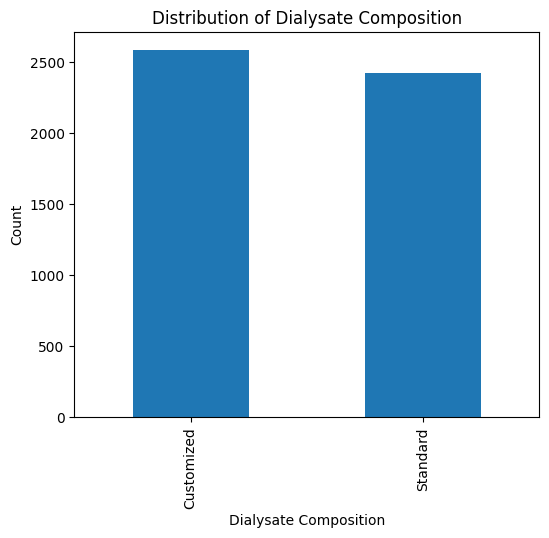

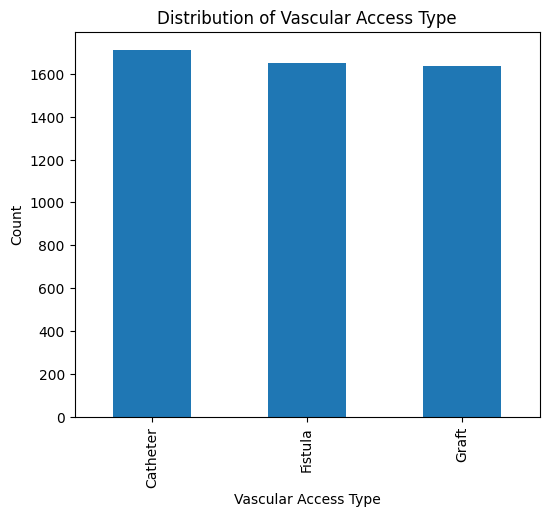

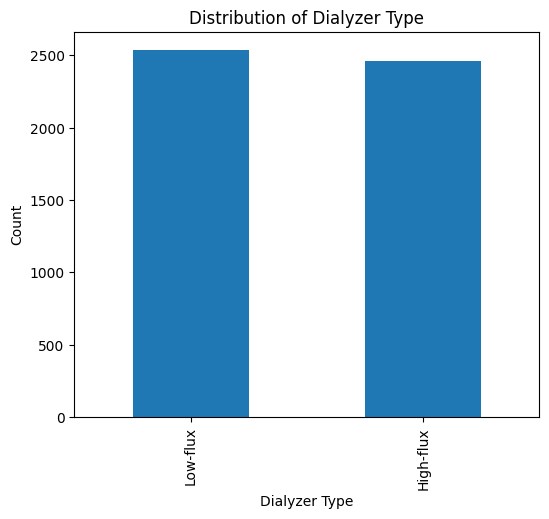

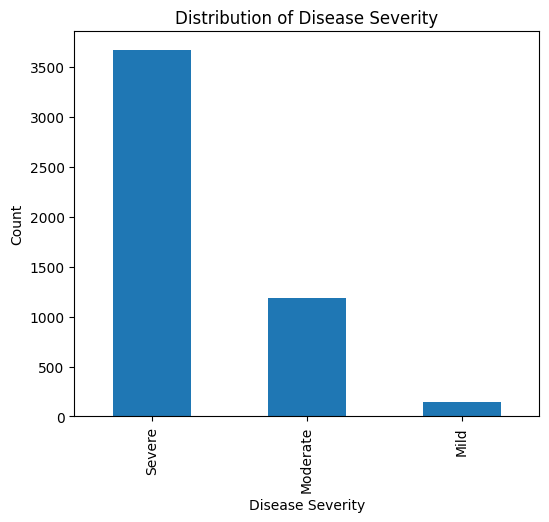

In [53]:
categorical_columns = [
    'Gender', 'Diabetes', 'Hypertension', 'Kidney Failure Cause', 'Dialysate Composition', 'Vascular Access Type', 'Dialyzer Type', 
    'Disease Severity'
]

# Plot histograms for each categorical variable with respect to Heart Risk
for col in categorical_columns:
    df[col] = df[col].astype('category')

for col in categorical_columns:
    plt.figure(figsize=(6,5))
    df[col].value_counts().plot(kind='bar')
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()

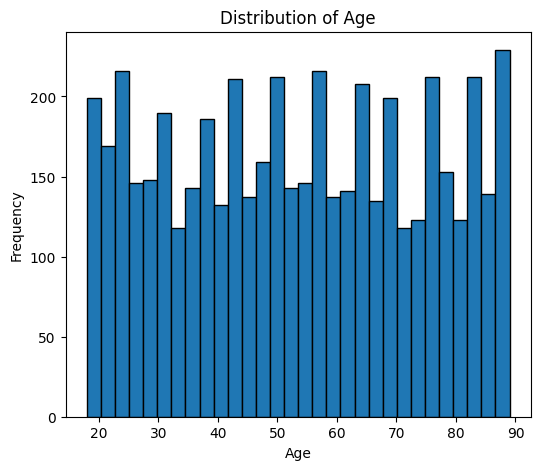

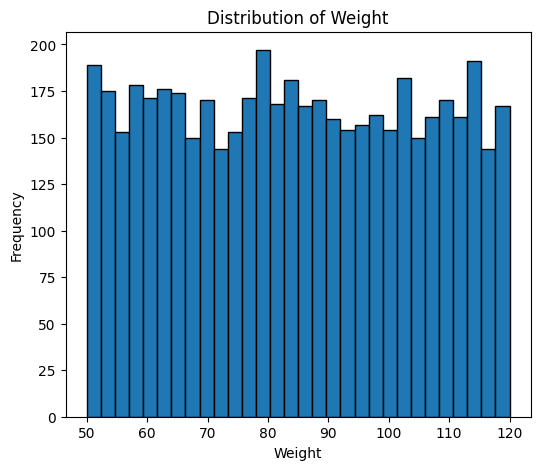

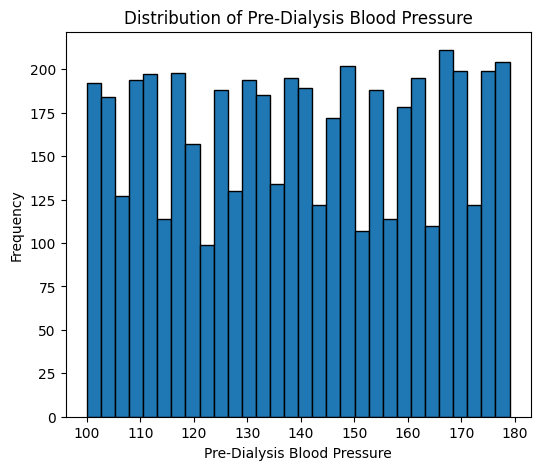

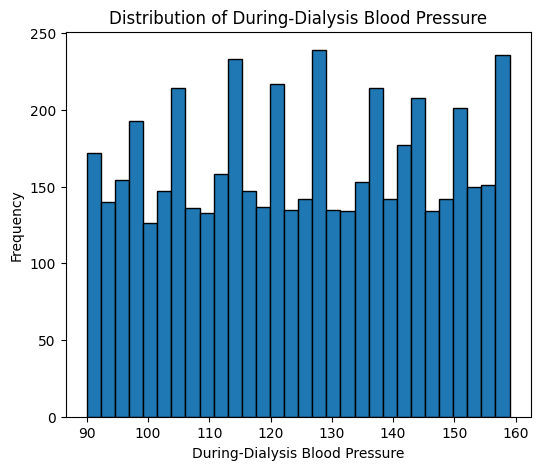

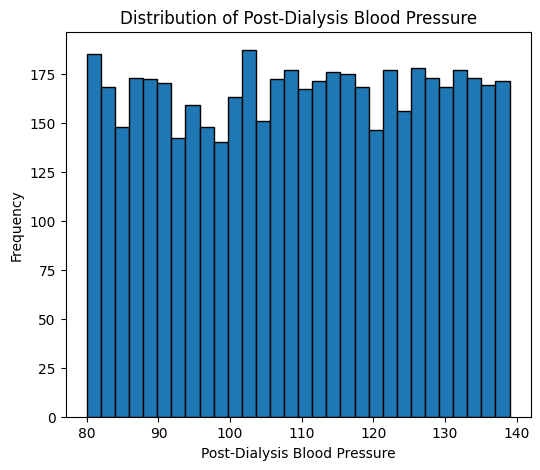

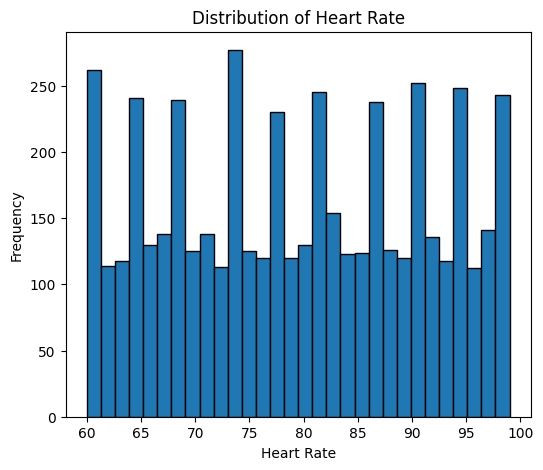

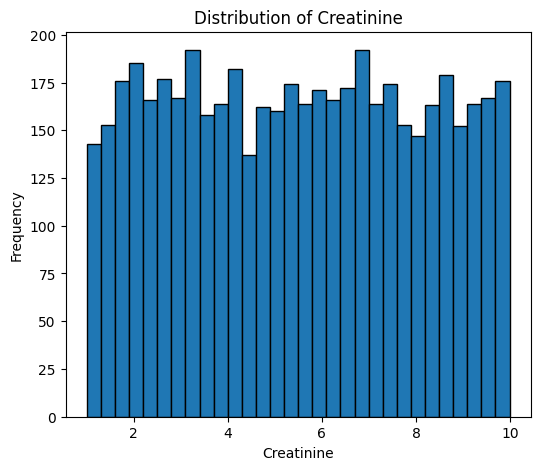

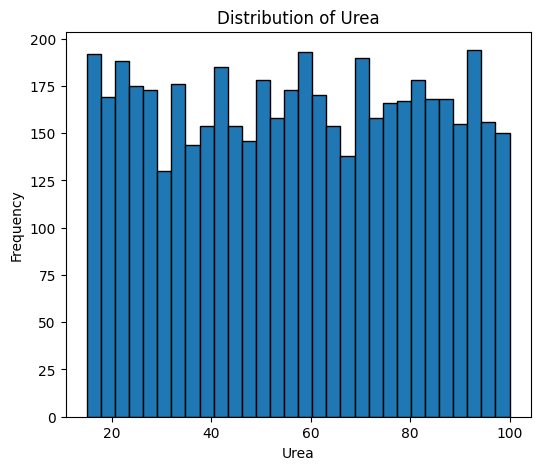

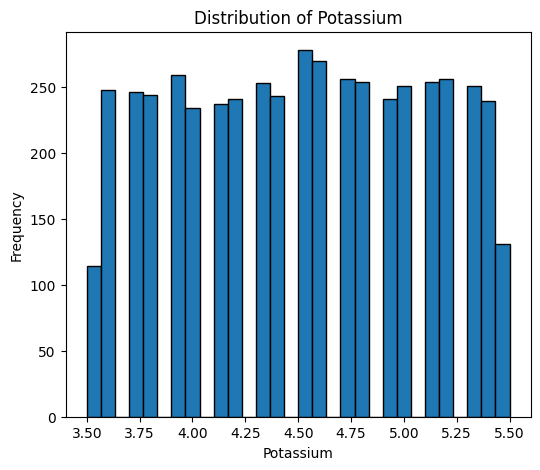

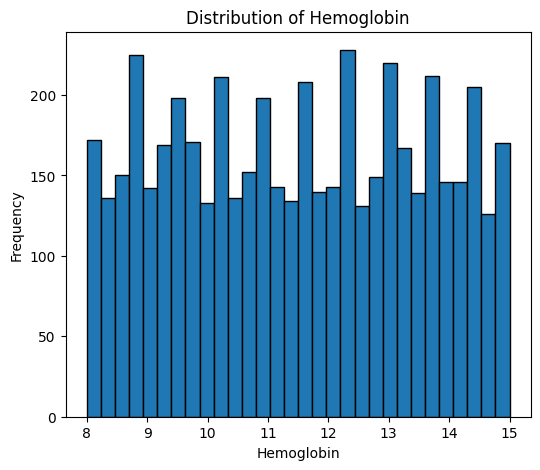

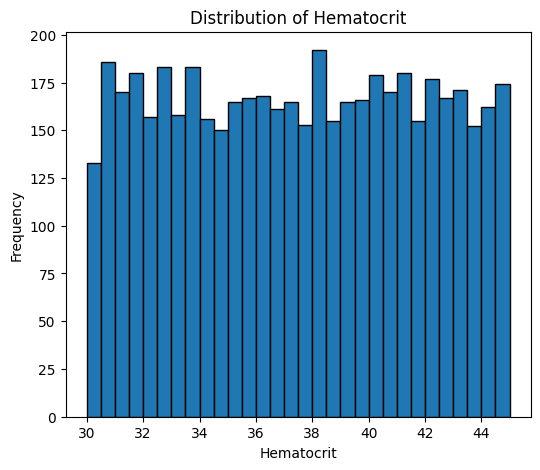

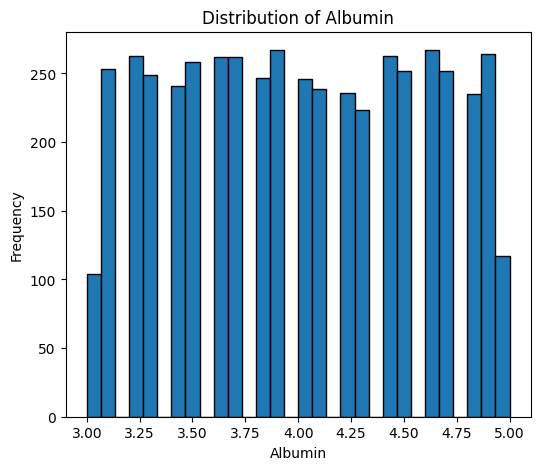

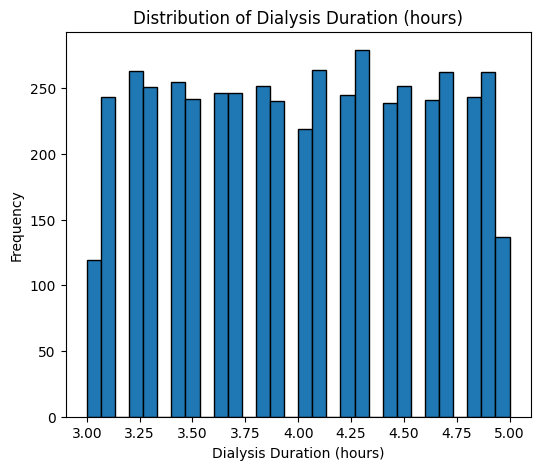

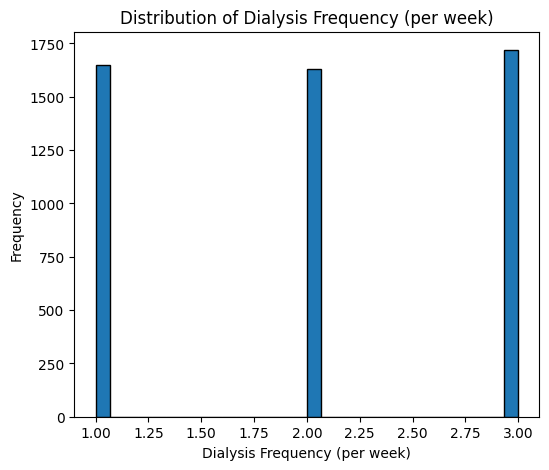

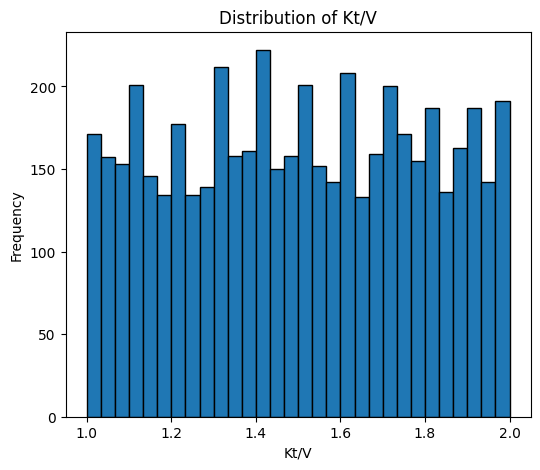

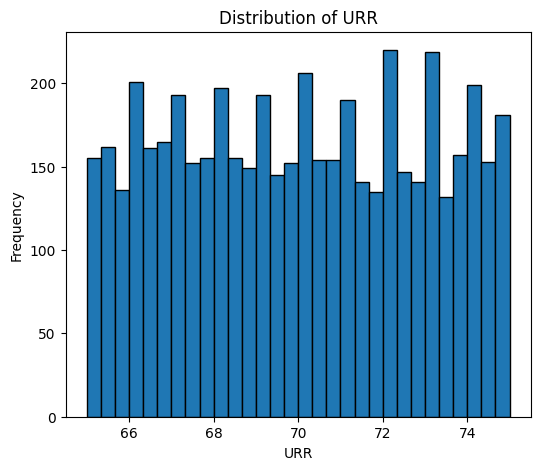

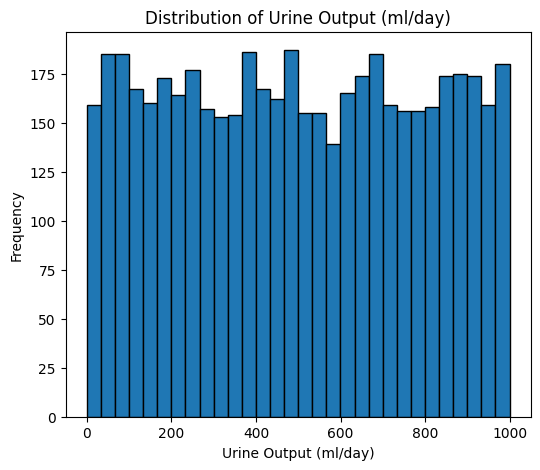

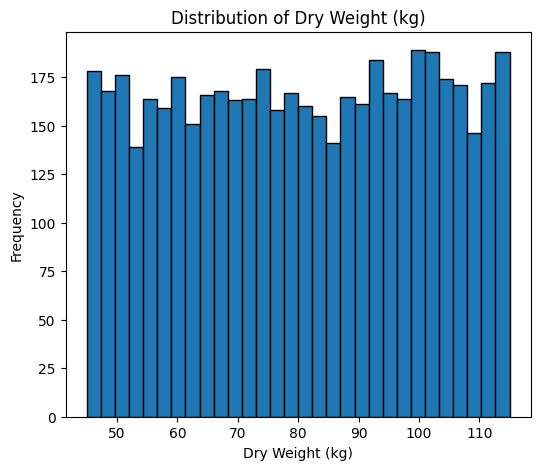

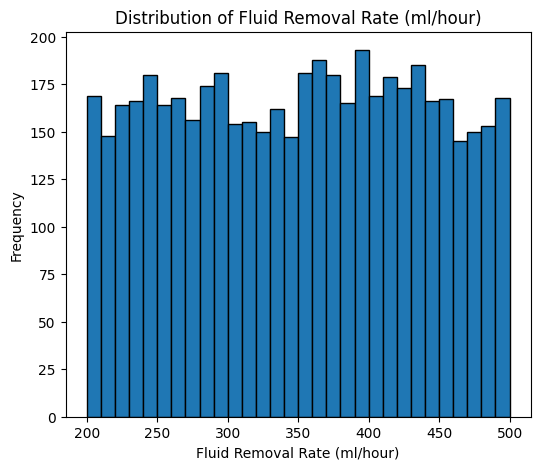

In [54]:
numerical_columns = [
    'Age','Weight', 'Pre-Dialysis Blood Pressure', 'During-Dialysis Blood Pressure', 'Post-Dialysis Blood Pressure', 
    'Heart Rate', 'Creatinine', 'Urea', 'Potassium', 'Hemoglobin', 'Hematocrit', 'Albumin','Dialysis Duration (hours)',
    'Dialysis Frequency (per week)','Kt/V','URR','Urine Output (ml/day)','Dry Weight (kg)','Fluid Removal Rate (ml/hour)'
]

for col in numerical_columns:
    plt.figure(figsize=(6,5))
    df[col].plot(kind='hist', bins=30, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

<Figure size 1000x1000 with 0 Axes>

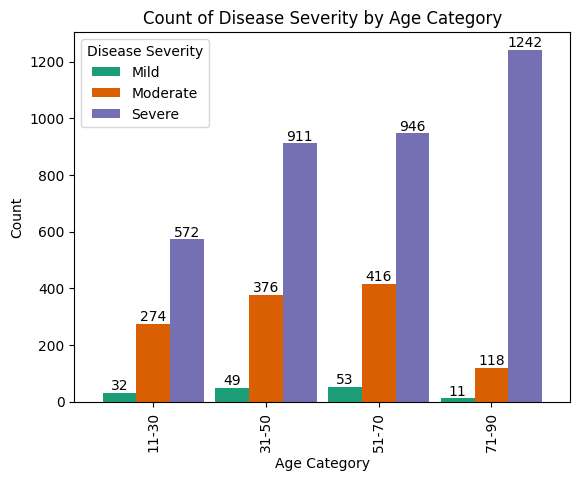

In [55]:
bins = [11, 30, 50, 70, 90]
labels = ['11-30', '31-50', '51-70', '71-90']
df['Age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


count_data = df.groupby(['Age_category', 'Disease Severity']).size().unstack(fill_value=0)
palette = sns.color_palette("Dark2", len(count_data.columns))
plt.figure(figsize=(10,10))
ax = count_data.plot(kind='bar', stacked=False, width = 0.9, color= palette)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Count of Disease Severity by Age Category')
plt.legend(title='Disease Severity')

for container in ax.containers:
    ax.bar_label(container)

plt.show()



In [56]:
df = df.drop(columns=['Age'])

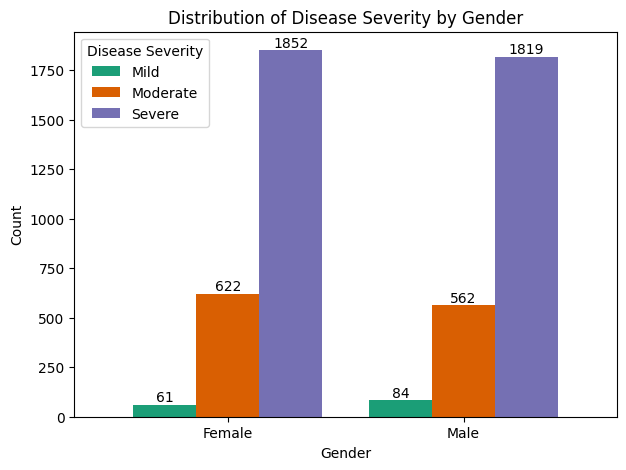

In [57]:
df['Gender'] = df['Gender'].astype('category')
df['Disease Severity'] = df['Disease Severity'].astype('category')


crosstab = pd.crosstab(df['Gender'], df['Disease Severity'])
palette = sns.color_palette("Dark2", len(crosstab.columns))
ax = crosstab.plot(kind='bar', figsize=(7, 5), width=0.8, color=palette)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Disease Severity by Gender')
plt.legend(title='Disease Severity')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

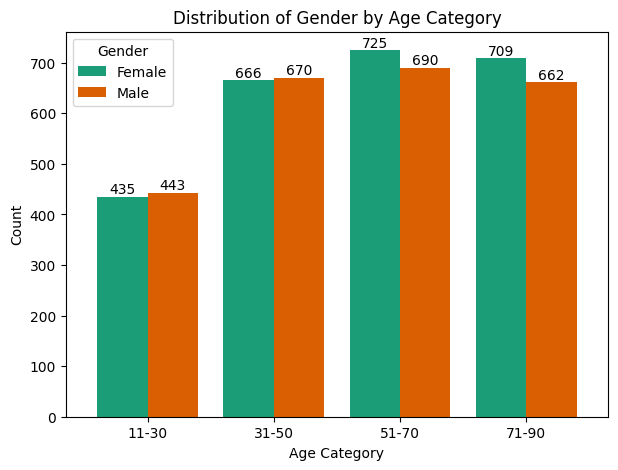

In [58]:
crosstab = pd.crosstab(df['Age_category'], df['Gender'])

palette = sns.color_palette("Dark2", len(crosstab.columns))
ax = crosstab.plot(kind='bar', figsize=(7, 5), width=0.8, color=palette)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Gender by Age Category')
plt.legend(title='Gender')
plt.xticks(rotation=0)


for container in ax.containers:
    ax.bar_label(container)

plt.show()

Visualization of Disease Severity by different Blood Pressure stages

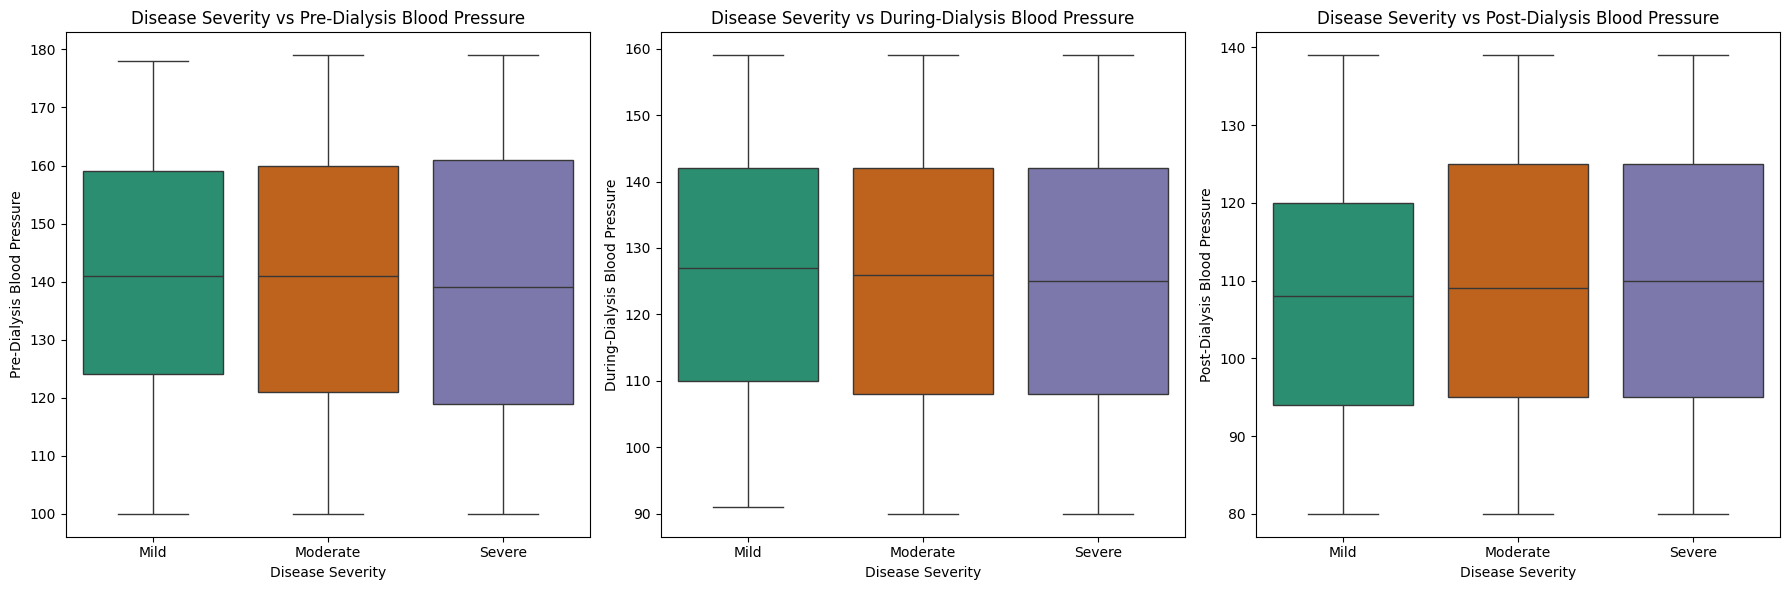

In [59]:
df['Disease Severity'] = df['Disease Severity'].astype('category')

columns_to_plot = [
    'Pre-Dialysis Blood Pressure',
    'During-Dialysis Blood Pressure',
    'Post-Dialysis Blood Pressure'
]

plt.figure(figsize=(18, 6))  # Adjust figure size as needed

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(1, len(columns_to_plot), i)  # Create subplot in a 1-row, n-column grid
    sns.boxplot(x='Disease Severity', y=column, data=df, palette='Dark2')
    plt.xlabel('Disease Severity')
    plt.ylabel(column)
    plt.title(f'Disease Severity vs {column}')

plt.tight_layout()
plt.show()

Distribution of Disease Severity across different products

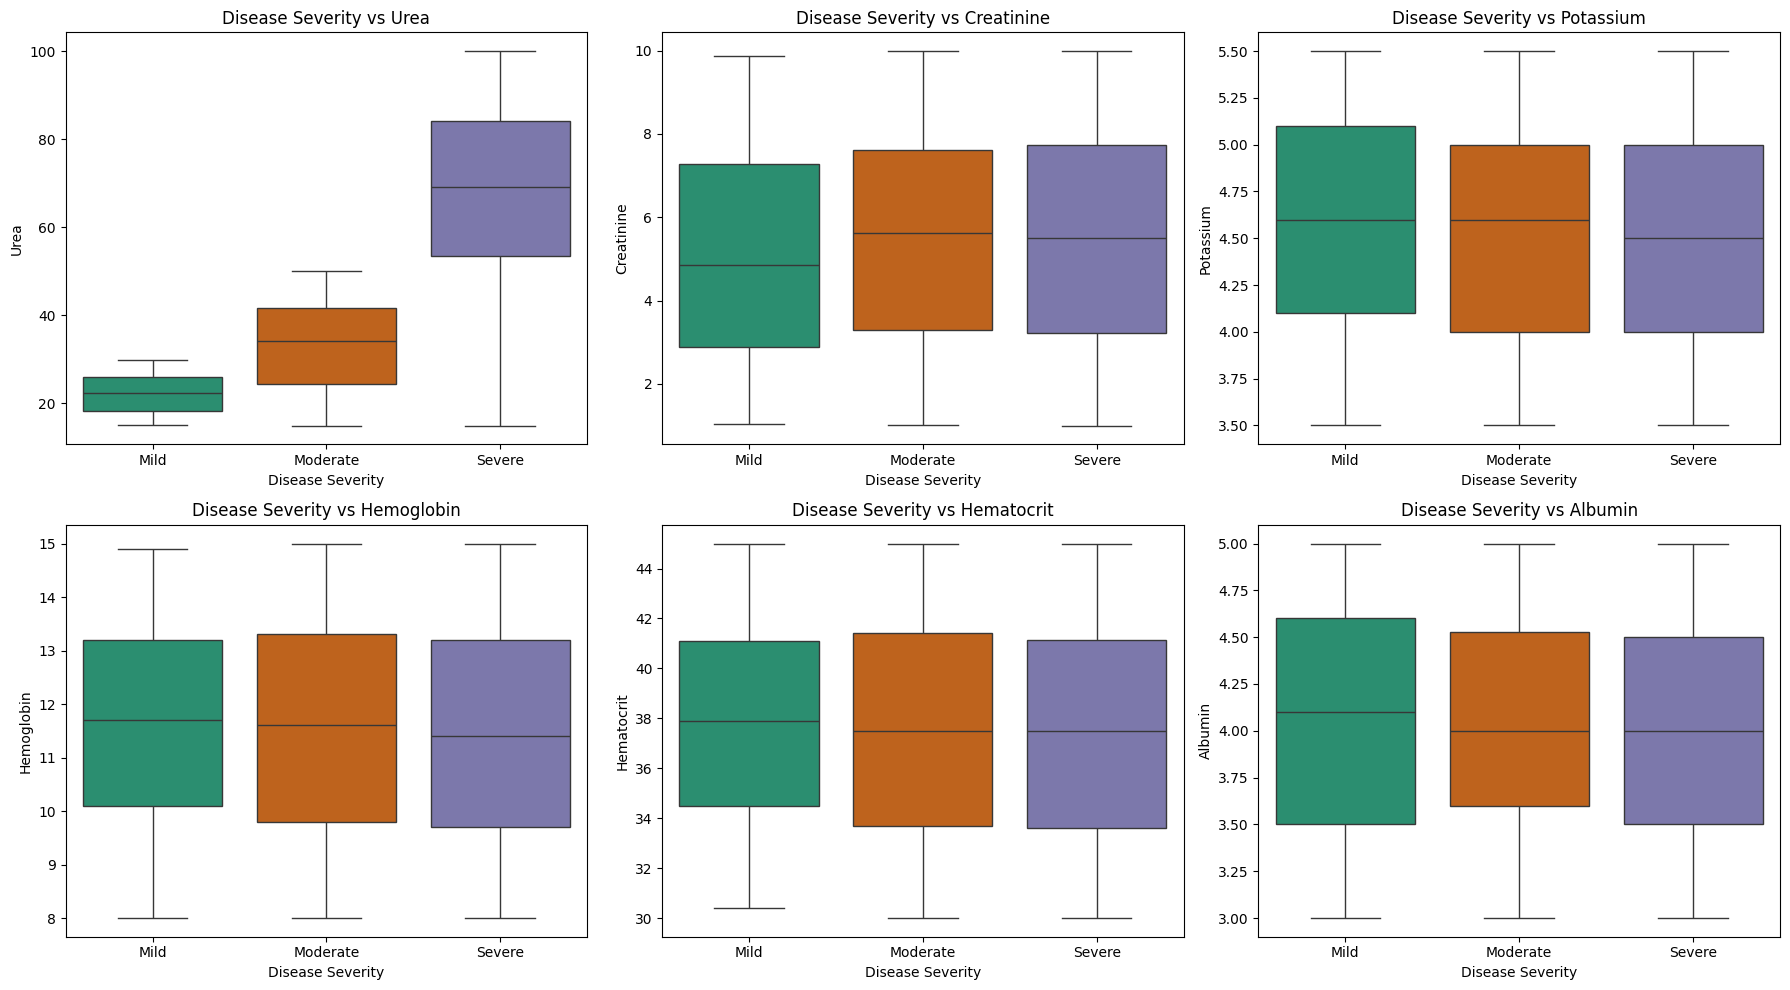

In [60]:
df['Disease Severity'] = df['Disease Severity'].astype('category')

# Columns to plot
columns_to_plot = [
    'Urea', 'Creatinine',  'Potassium', 'Hemoglobin', 'Hematocrit', 'Albumin'
]

# Create subplots
plt.figure(figsize=(18, 10))  # Adjust figure size as needed

# Loop through each column and create a box plot
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 3, i)  # Create subplot in a 2-row, 3-column grid
    sns.boxplot(x='Disease Severity', y=column, data=df, palette='Dark2')
    plt.xlabel('Disease Severity')
    plt.ylabel(column)
    plt.title(f'Disease Severity vs {column}')

# Adjust layout
plt.tight_layout()
plt.show()


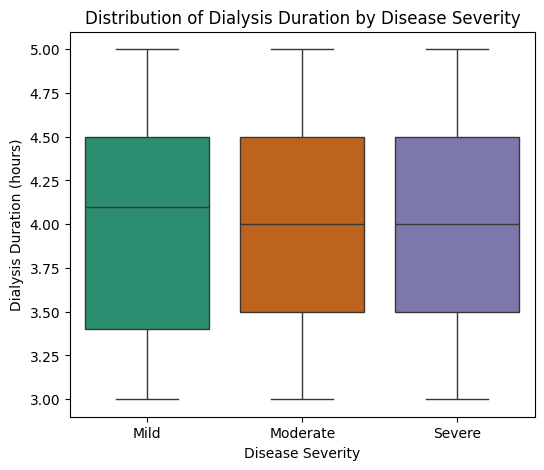

In [61]:
df['Disease Severity'] = df['Disease Severity'].astype('category')

plt.figure(figsize=(6, 5))
sns.boxplot(x='Disease Severity', y='Dialysis Duration (hours)', data=df, palette='Dark2')
plt.xlabel('Disease Severity')
plt.ylabel('Dialysis Duration (hours)')
plt.title('Distribution of Dialysis Duration by Disease Severity')
plt.show()

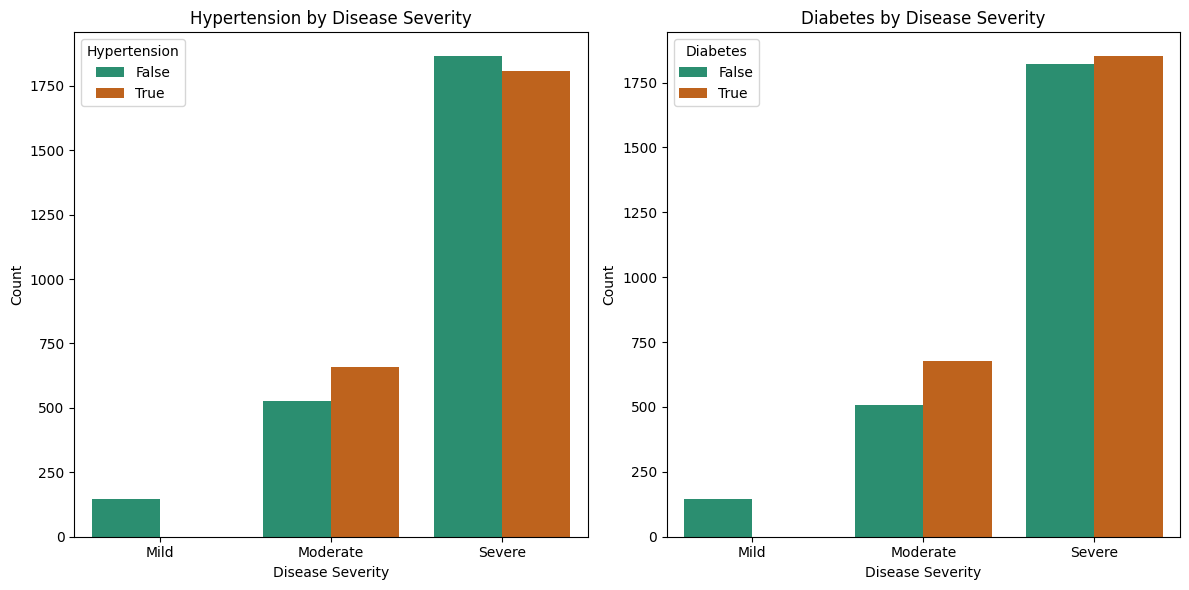

In [62]:
df['Disease Severity'] = df['Disease Severity'].astype('category')

boolean_columns = ['Hypertension', 'Diabetes']

plt.figure(figsize=(12, 6))  

for i, col in enumerate(boolean_columns, start=1):
    plt.subplot(1, len(boolean_columns), i)  # Create subplot in a 1-row, n-column grid
    sns.countplot(x='Disease Severity', hue=col, data=df, palette='Dark2')
    plt.xlabel('Disease Severity')
    plt.ylabel('Count')
    plt.title(f'{col} by Disease Severity')

# Adjust layout
plt.tight_layout()
plt.show()

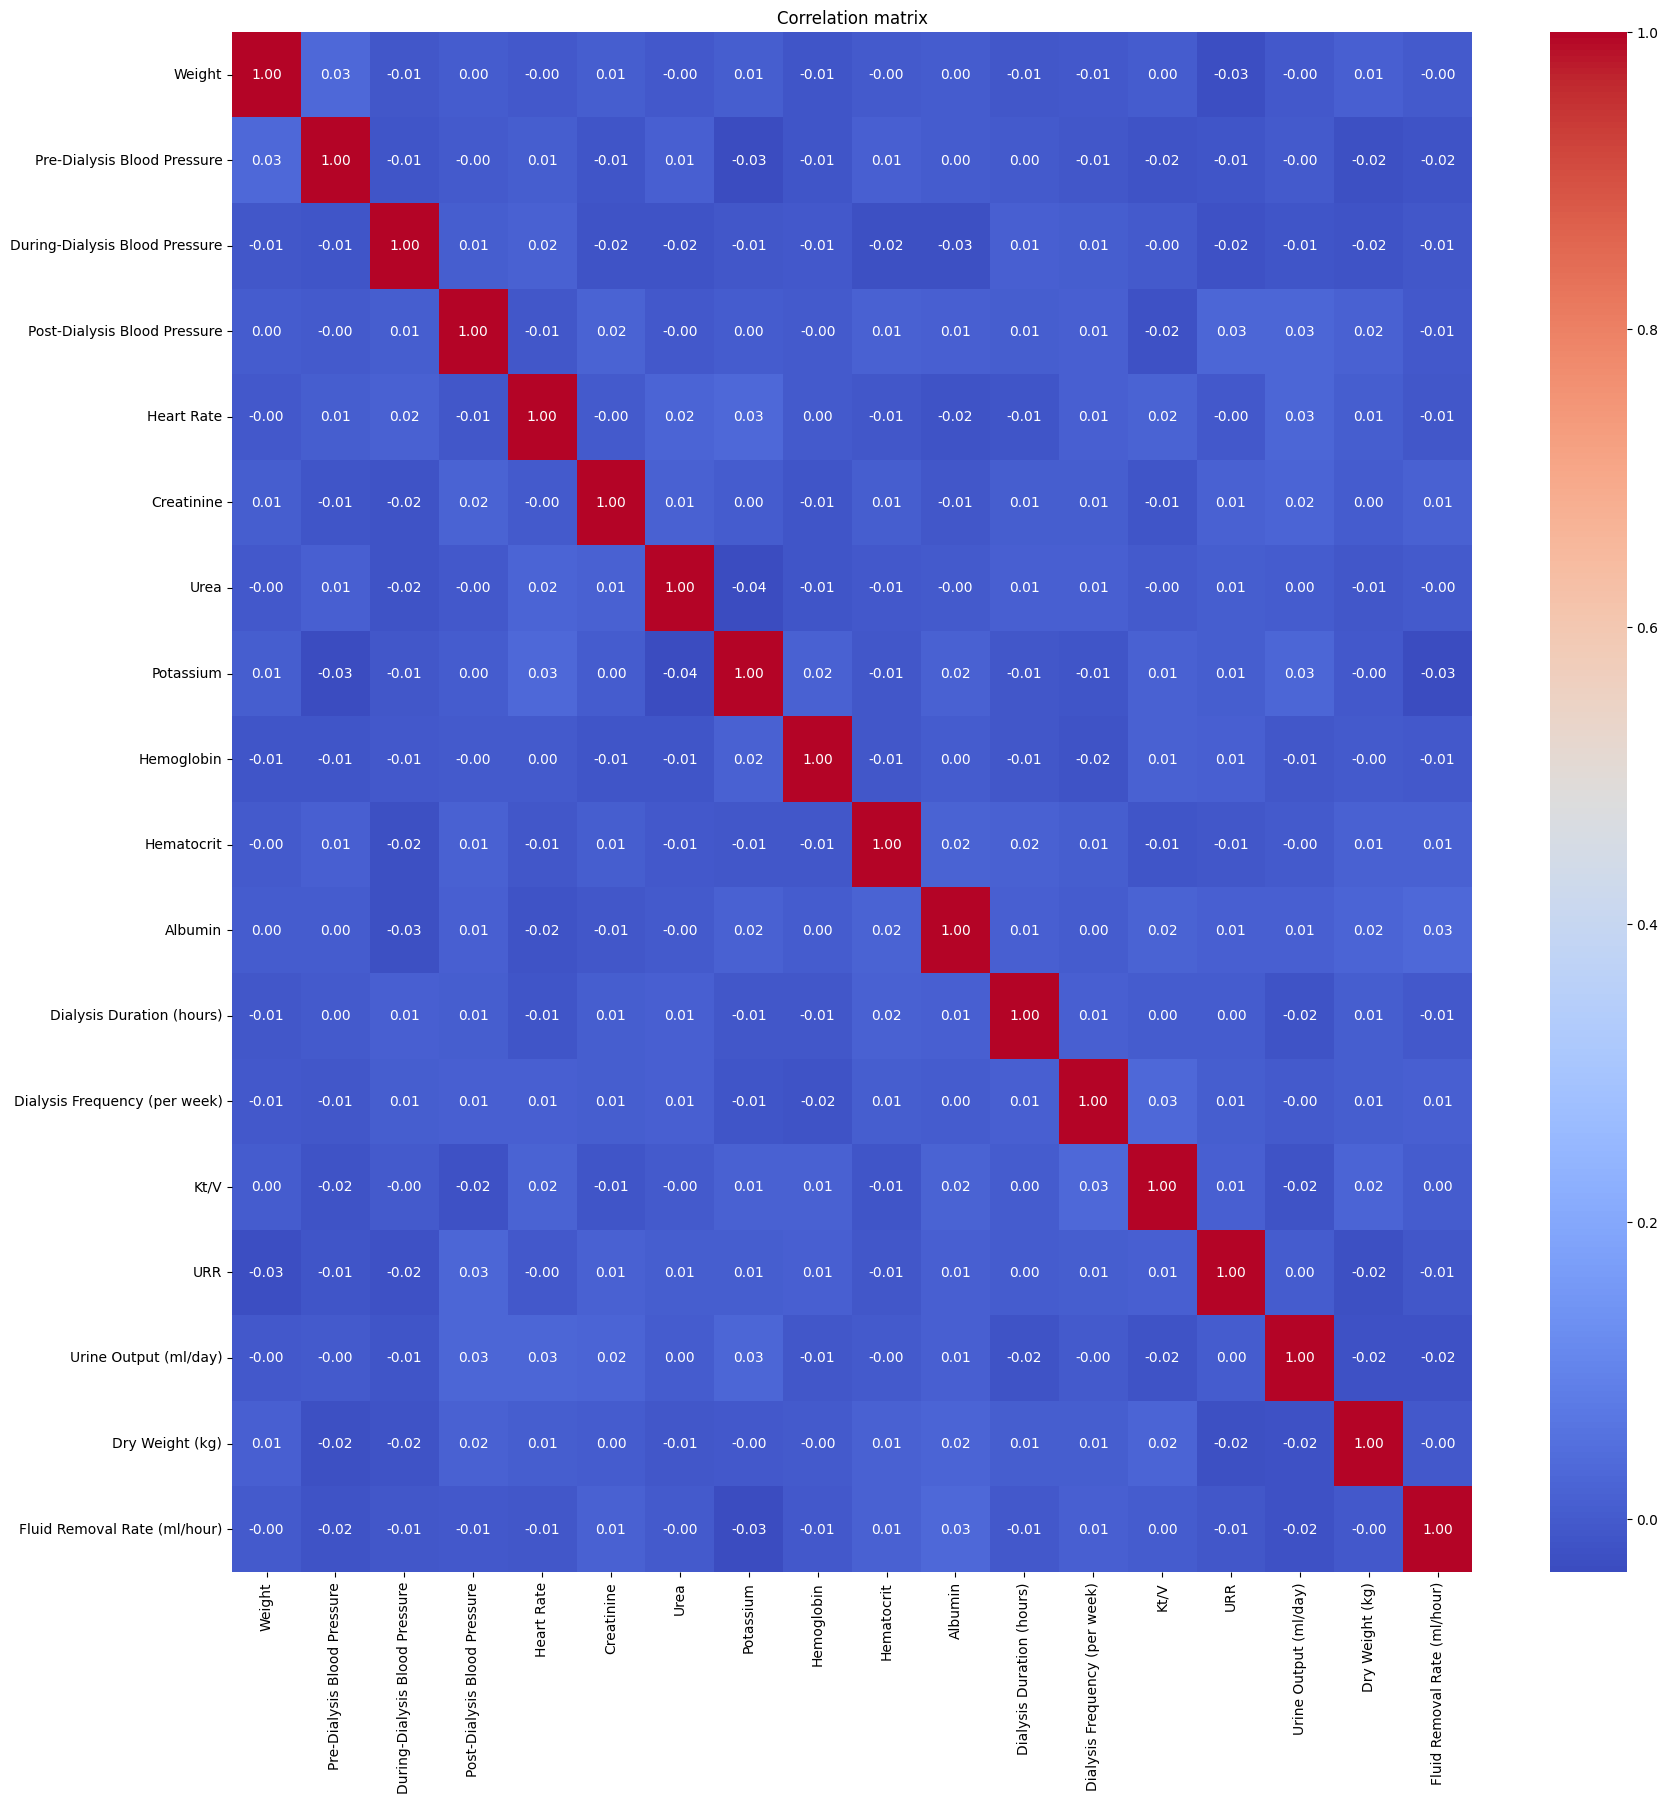

In [63]:
numerical_columns = [col for col in numerical_columns if col != 'Age'] # type: ignore
matrix_df = df[numerical_columns]
corr_matrix = matrix_df.corr() 
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.xticks(rotation=90)
plt.show()

In [64]:
df.columns

Index(['Gender', 'Weight', 'Diabetes', 'Hypertension', 'Kidney Failure Cause',
       'Pre-Dialysis Blood Pressure', 'During-Dialysis Blood Pressure',
       'Post-Dialysis Blood Pressure', 'Heart Rate', 'Creatinine', 'Urea',
       'Potassium', 'Hemoglobin', 'Hematocrit', 'Albumin',
       'Dialysis Duration (hours)', 'Dialysis Frequency (per week)',
       'Dialysate Composition', 'Vascular Access Type', 'Dialyzer Type',
       'Kt/V', 'URR', 'Urine Output (ml/day)', 'Dry Weight (kg)',
       'Fluid Removal Rate (ml/hour)', 'Disease Severity', 'Age_category'],
      dtype='object')

In [65]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame named df
# For Chi-square test
chi_square_variables = ['Age_category','Gender', 'Diabetes', 'Hypertension', 'Kidney Failure Cause', 'Dialysate Composition', 'Vascular Access Type', 'Dialyzer Type', 
    'Disease Severity']
chi_square_results = {}
for var in chi_square_variables:
    contingency_table = pd.crosstab(df[var], df['Disease Severity'])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    chi_square_results[var] = {'chi2': chi2, 'p-value': p}
   
print("Chi-square test results:")
for var, result in chi_square_results.items():
    print(f"\n{var}:")
    print(f"  Chi-square: {result['chi2']}")
    print(f"  p-value: {result['p-value']}")

Chi-square test results:

Age_category:
  Chi-square: 288.54677371081544
  p-value: 2.3239506894199116e-59

Gender:
  Chi-square: 6.006643118989345
  p-value: 0.049621971998709984

Diabetes:
  Chi-square: 169.06457277471065
  p-value: 1.9413081567291342e-37

Hypertension:
  Chi-square: 159.1548959547548
  p-value: 2.7539335663560025e-35

Kidney Failure Cause:
  Chi-square: 0.7030215606412816
  p-value: 0.9509557789371256

Dialysate Composition:
  Chi-square: 0.6151352517831853
  p-value: 0.7352331450695924

Vascular Access Type:
  Chi-square: 2.0620878715177975
  p-value: 0.7243402627547166

Dialyzer Type:
  Chi-square: 0.3664559999205307
  p-value: 0.83257830627433

Disease Severity:
  Chi-square: 9999.999999999998
  p-value: 0.0


In [66]:
cat_columns = [
    'Age_category', 'Gender', 'Diabetes', 'Hypertension', 'Kidney Failure Cause',
    'Dialysate Composition', 'Vascular Access Type', 'Dialyzer Type', 'Disease Severity'
]

label_encoder = LabelEncoder()
df['Age_category'] = label_encoder.fit_transform(df['Age_category'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])
df['Hypertension'] = label_encoder.fit_transform(df['Hypertension'])
df['Kidney Failure Cause'] = label_encoder.fit_transform(df['Kidney Failure Cause'])
df['Dialysate Composition'] = label_encoder.fit_transform(df['Dialysate Composition'])
df['Vascular Access Type'] = label_encoder.fit_transform(df['Vascular Access Type'])
df['Dialyzer Type'] = label_encoder.fit_transform(df['Dialyzer Type'])
df['Disease Severity'] = label_encoder.fit_transform(df['Disease Severity'])

print("Encoded DataFrame:")
print(df)

print("\nLabel Mapping:")
for label, code in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {code}")

Encoded DataFrame:
      Gender  Weight  Diabetes  Hypertension  Kidney Failure Cause  \
0          0    97.4         1             1                     2   
1          1    72.7         1             0                     1   
2          1   111.6         0             1                     2   
3          1    60.0         0             0                     1   
4          1    52.1         0             0                     0   
...      ...     ...       ...           ...                   ...   
4995       0    56.4         1             1                     1   
4996       1    66.6         0             1                     0   
4997       0    95.1         0             0                     1   
4998       0    99.9         0             1                     0   
4999       0    79.2         0             0                     1   

      Pre-Dialysis Blood Pressure  During-Dialysis Blood Pressure  \
0                             103                             133   
1 

In [67]:
# For ANOVA test
anova_variables = ['Weight', 'Pre-Dialysis Blood Pressure', 'During-Dialysis Blood Pressure', 'Post-Dialysis Blood Pressure', 
    'Heart Rate', 'Creatinine', 'Urea', 'Potassium', 'Hemoglobin', 'Hematocrit', 'Albumin','Dialysis Duration (hours)',
    'Dialysis Frequency (per week)','Kt/V','URR','Urine Output (ml/day)','Dry Weight (kg)','Fluid Removal Rate (ml/hour)']
anova_results = {}
for var in anova_variables:
    f_statistic, p_value = stats.f_oneway(df[var][df['Disease Severity'] == 0],
                                           df[var][df['Disease Severity'] == 1],
                                           df[var][df['Disease Severity'] == 2]
                                           )
    anova_results[var] = {'F-statistic': f_statistic, 'p-value': p_value}

print("\nANOVA test results:")
for var, result in anova_results.items():
    print(f"\n{var}:")
    print(f"  F-statistic: {result['F-statistic']}")
    print(f"  p-value: {result['p-value']}")



ANOVA test results:

Weight:
  F-statistic: 0.0909968420774499
  p-value: 0.9130221070551361

Pre-Dialysis Blood Pressure:
  F-statistic: 0.23902985506942984
  p-value: 0.7874003768404227

During-Dialysis Blood Pressure:
  F-statistic: 0.19413199428563596
  p-value: 0.8235554041925132

Post-Dialysis Blood Pressure:
  F-statistic: 1.7928603428317877
  p-value: 0.1665903632111692

Heart Rate:
  F-statistic: 0.08539858704406572
  p-value: 0.9181475902258108

Creatinine:
  F-statistic: 1.9610540673259942
  p-value: 0.1408183015058851

Urea:
  F-statistic: 1545.587344462011
  p-value: 0.0

Potassium:
  F-statistic: 1.7083531045010683
  p-value: 0.18126969554084965

Hemoglobin:
  F-statistic: 2.672362631589459
  p-value: 0.0691875401682396

Hematocrit:
  F-statistic: 0.9370777349024186
  p-value: 0.39183985710445224

Albumin:
  F-statistic: 3.5889749466212435
  p-value: 0.027697871286538847

Dialysis Duration (hours):
  F-statistic: 0.012987034084586797
  p-value: 0.9870969668696347

Dialys

In [68]:
df.columns

Index(['Gender', 'Weight', 'Diabetes', 'Hypertension', 'Kidney Failure Cause',
       'Pre-Dialysis Blood Pressure', 'During-Dialysis Blood Pressure',
       'Post-Dialysis Blood Pressure', 'Heart Rate', 'Creatinine', 'Urea',
       'Potassium', 'Hemoglobin', 'Hematocrit', 'Albumin',
       'Dialysis Duration (hours)', 'Dialysis Frequency (per week)',
       'Dialysate Composition', 'Vascular Access Type', 'Dialyzer Type',
       'Kt/V', 'URR', 'Urine Output (ml/day)', 'Dry Weight (kg)',
       'Fluid Removal Rate (ml/hour)', 'Disease Severity', 'Age_category'],
      dtype='object')

Train_test_Split

In [69]:
X = df.drop('Disease Severity', axis=1)
y = df['Disease Severity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((4000, 26), (1000, 26), (4000,), (1000,))

PCA to determine multicollinearity

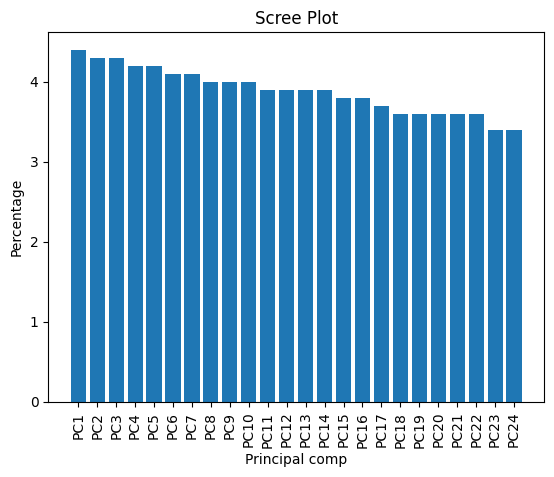

In [70]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.90,random_state=42)  # Example: retaining 90% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pca.explained_variance_ratio_


per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree Plot')
plt.show()


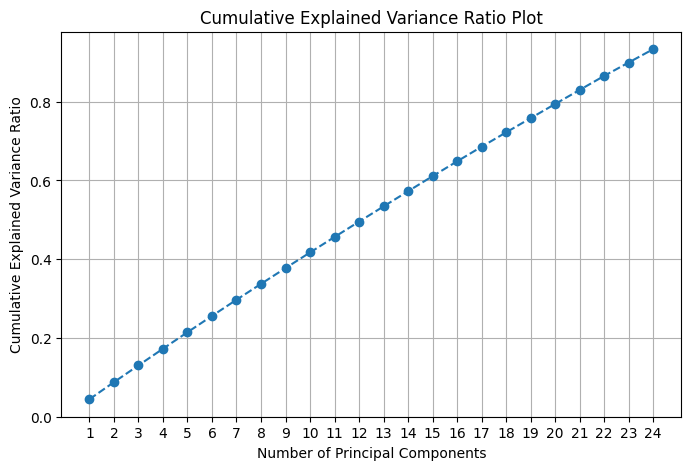

In [71]:
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum() # type: ignore

# Plotting the cumulative variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio Plot')
plt.grid(True)
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.show()


Logistic Regression 

In [81]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

smote = SMOTE()
pipeline = Pipeline([
    ('smote', smote),
    ('lg', LogisticRegression())
])


pipeline.fit(X_train_pca,y_train)


y_pred_train = pipeline.predict(X_train_pca)
y_pred_test = pipeline.predict(X_test_pca)

print('Training accuracy score :',accuracy_score(y_train, y_pred_train))
print('Training F1 score:',f1_score(y_train, y_pred_train, average='macro'))


print('Testing accuracy score :',accuracy_score(y_test, y_pred_test))
print('Testing F1 score:',f1_score(y_test, y_pred_test, average='macro'))


Training accuracy score : 0.82225
Training F1 score: 0.6991926778615323
Testing accuracy score : 0.813
Testing F1 score: 0.7081419639443336


In [83]:
lg_param_grid = {
    'lg__C': [0.1, 1, 10, 100, 200],
    'lg__penalty': ['l1', 'l2']
}

lg_grid_search = GridSearchCV(pipeline, lg_param_grid, cv=5, scoring='accuracy')
lg_grid_search.fit(X_train_pca,y_train)

#best_model = lg_grid_search.best_estimator_
print(f"Best Parameters: {lg_grid_search.best_params_}")
print(f"Best Score: {lg_grid_search.best_score_}")

Best Parameters: {'lg__C': 100, 'lg__penalty': 'l2'}
Best Score: 0.8185


In [84]:
pipeline.set_params(**lg_grid_search.best_params_)
pipeline.fit(X_train_pca, y_train)
y_predict = pipeline.predict(X_test_pca)


final_accuracy = accuracy_score(y_test, y_predict)
final_report = classification_report(y_test, y_predict)
final_confusion = confusion_matrix(y_test, y_predict)

print(f"Logistic Regression Accuracy: {final_accuracy}\n")
print(f"Classification Report:\n{final_report}")
print(f"Confusion Matrix:\n{final_confusion}")

Logistic Regression Accuracy: 0.819

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.89      0.54        35
           1       0.64      0.77      0.70       243
           2       0.96      0.83      0.89       722

    accuracy                           0.82      1000
   macro avg       0.66      0.83      0.71      1000
weighted avg       0.86      0.82      0.83      1000

Confusion Matrix:
[[ 31   3   1]
 [ 32 187  24]
 [ 17 104 601]]


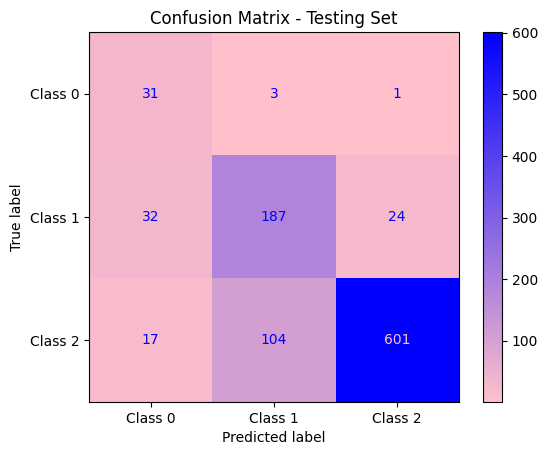

In [91]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['pink', 'blue'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=final_confusion, display_labels=['Class 0', 'Class 1', 'Class 2'])
disp_test.plot(cmap=custom_cmap)
plt.title('Confusion Matrix - Testing Set')
plt.show()

Decision Tree Model

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

smote = SMOTE()
dt_pipeline = Pipeline([
    ('smote', smote),
    ('dt', DecisionTreeClassifier())
])


dt_pipeline.fit(X_train_pca,y_train)

y_pred_train = dt_pipeline.predict(X_train_pca)
y_pred_test = dt_pipeline.predict(X_test_pca)

print('Training accuracy score :',accuracy_score(y_train, y_pred_train))
print('Training F1 score:',f1_score(y_train, y_pred_train, average='macro'))


print('Testing accuracy score :',accuracy_score(y_test, y_pred_test))
print('Testing F1 score:',f1_score(y_test, y_pred_test, average='macro'))


Training accuracy score : 1.0
Training F1 score: 1.0
Testing accuracy score : 0.642
Testing F1 score: 0.4481424177982311


In [97]:
dt_param_grid = {
        'dt__max_depth': [None, 5, 10, 20, 30]
}

dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_pca,y_train)


print(f"Best Parameters: {dt_grid_search.best_params_}")
print(f"Best Score: {dt_grid_search.best_score_}")

Best Parameters: {'dt__max_depth': 30}
Best Score: 0.6759999999999999


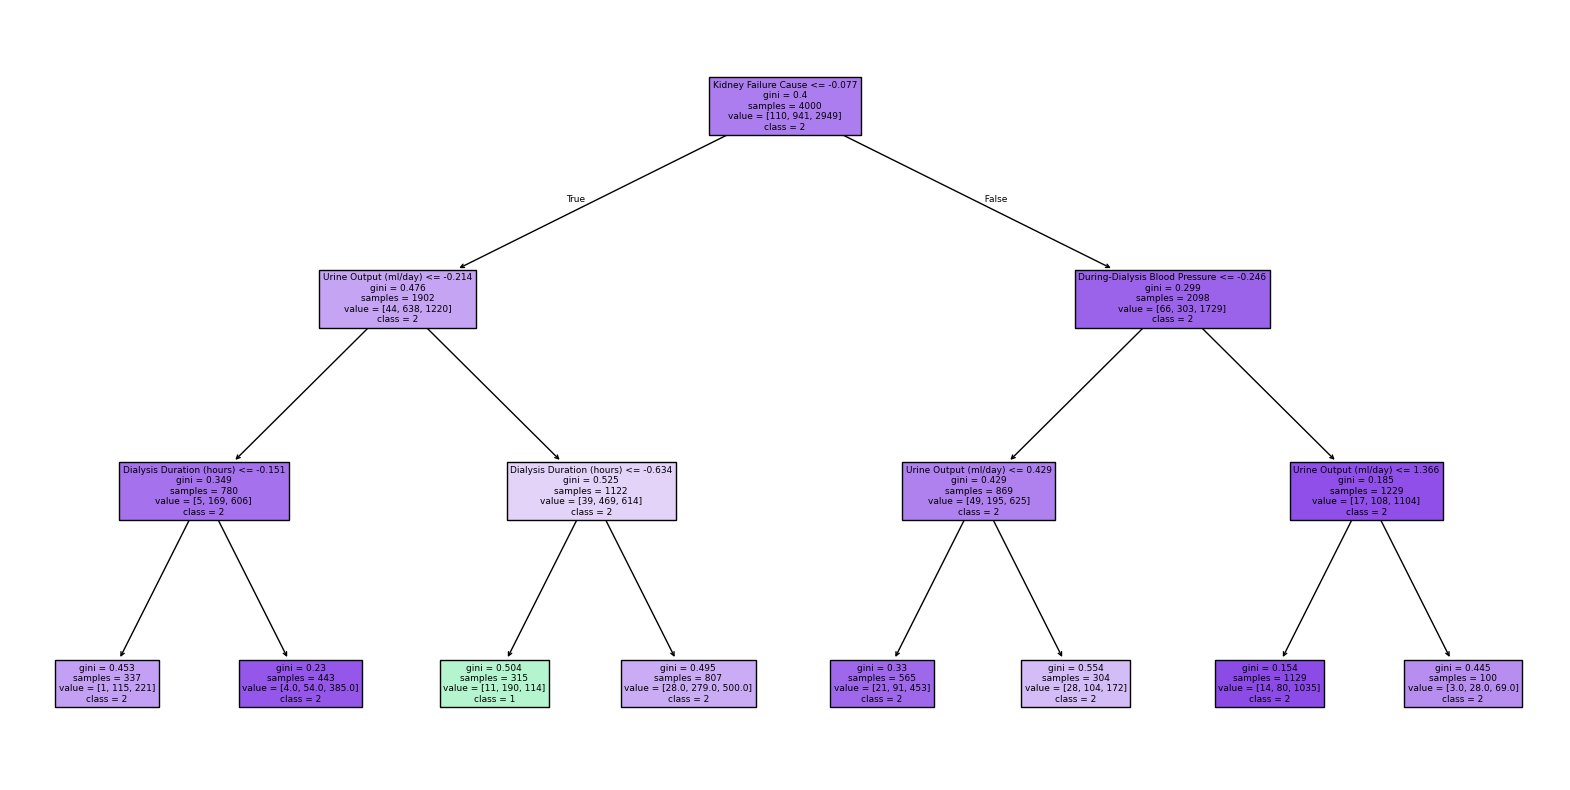

In [100]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train_pca, y_train)

# Convert class names to strings
class_names = list(map(str, model.classes_))

# Plot the decision tree
plt.figure(figsize=(20, 10))
_ = plot_tree(model, 
              feature_names=X_train.columns,  
              class_names=class_names,
              filled=True)
plt.show()

In [101]:
dt_pipeline.set_params(**dt_grid_search.best_params_)
dt_pipeline.fit(X_train_pca, y_train)
y_predict = dt_pipeline.predict(X_test_pca)


final_accuracy = accuracy_score(y_test, y_predict)
final_report = classification_report(y_test, y_predict)
dt_final_confusion = confusion_matrix(y_test, y_predict)

print(f"Decision Tree Accuracy: {final_accuracy}\n")
print(f"Classification Report:\n{final_report}")
print(f"Confusion Matrix:\n{dt_final_confusion}")

Decision Tree Accuracy: 0.671

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.34      0.26        35
           1       0.42      0.55      0.47       243
           2       0.84      0.73      0.78       722

    accuracy                           0.67      1000
   macro avg       0.49      0.54      0.51      1000
weighted avg       0.72      0.67      0.69      1000

Confusion Matrix:
[[ 12  12  11]
 [ 22 133  88]
 [ 23 173 526]]


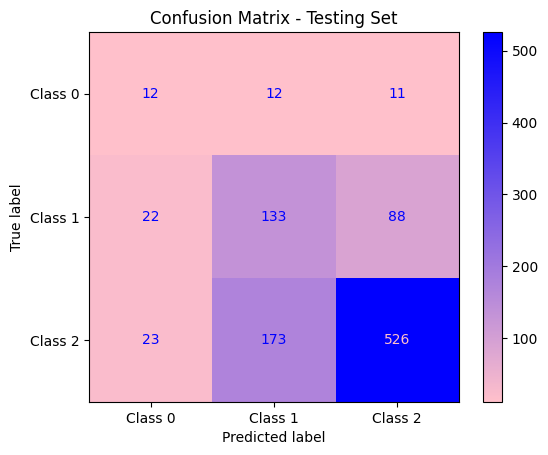

In [103]:
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['pink', 'blue'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=dt_final_confusion, display_labels=['Class 0', 'Class 1', 'Class 2'])
disp_test.plot(cmap=custom_cmap)
plt.title('Confusion Matrix - Testing Set')
plt.show()

Random Forest Classification model

In [107]:
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE()
rf_pipeline = Pipeline([
    ('smote', smote),
    ('rf', RandomForestClassifier())
])


rf_pipeline.fit(X_train_pca,y_train)

y_pred_train = rf_pipeline.predict(X_train_pca)
y_pred_test = rf_pipeline.predict(X_test_pca)

print('Training accuracy score :',accuracy_score(y_train, y_pred_train))
print('Training F1 score:',f1_score(y_train, y_pred_train, average='macro'))


print('Testing accuracy score :',accuracy_score(y_test, y_pred_test))
print('Testing F1 score:',f1_score(y_test, y_pred_test, average='macro'))

Training accuracy score : 1.0
Training F1 score: 1.0
Testing accuracy score : 0.815
Testing F1 score: 0.6048116421369949


In [108]:
rf_param_grid = {
        'rf__n_estimators': [10, 20, 30],
        'rf__max_depth' : [10, 20, 30]
}

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_pca,y_train)

print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"Best Score: {rf_grid_search.best_score_}")

Best Parameters: {'rf__max_depth': 20, 'rf__n_estimators': 30}
Best Score: 0.8


In [111]:
rf_pipeline.set_params(**rf_grid_search.best_params_)
rf_pipeline.fit(X_train_pca, y_train)
rf_y_predict = rf_pipeline.predict(X_test_pca)


rf_final_accuracy = accuracy_score(y_test, y_predict)
rf_final_report = classification_report(y_test, y_predict)
rf_final_confusion = confusion_matrix(y_test, y_predict)

print(f"Random Forest Accuracy: {rf_final_accuracy}\n")
print(f"Classification Report:\n{rf_final_report}")
print(f"Confusion Matrix:\n{rf_final_confusion}")

Random Forest Accuracy: 0.671

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.34      0.26        35
           1       0.42      0.55      0.47       243
           2       0.84      0.73      0.78       722

    accuracy                           0.67      1000
   macro avg       0.49      0.54      0.51      1000
weighted avg       0.72      0.67      0.69      1000

Confusion Matrix:
[[ 12  12  11]
 [ 22 133  88]
 [ 23 173 526]]


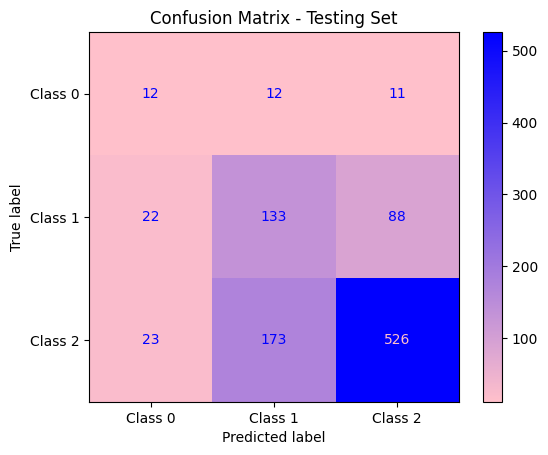

In [112]:
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['pink', 'blue'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=rf_final_confusion, display_labels=['Class 0', 'Class 1', 'Class 2'])
disp_test.plot(cmap=custom_cmap)
plt.title('Confusion Matrix - Testing Set')
plt.show()